In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

##load the features from the pretrained model
features = np.load('../out_TrainedModel/dataset2_features.npy')
labels = np.load('../out_TrainedModel/dataset2_labels.npy')

print(features.shape)
print(labels.shape)

(6000, 512)
(6000,)


In [3]:
##split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=42, stratify=labels
)


print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4200, 512)
Test set shape: (1800, 512)


Accuracy: 91.33%
Classification Report:
              precision    recall  f1-score   support

       Gland       0.85      0.89      0.87       600
    Nongland       0.90      0.87      0.89       600
       Tumor       0.98      0.98      0.98       600

    accuracy                           0.91      1800
   macro avg       0.91      0.91      0.91      1800
weighted avg       0.91      0.91      0.91      1800

Confusion Matrix:


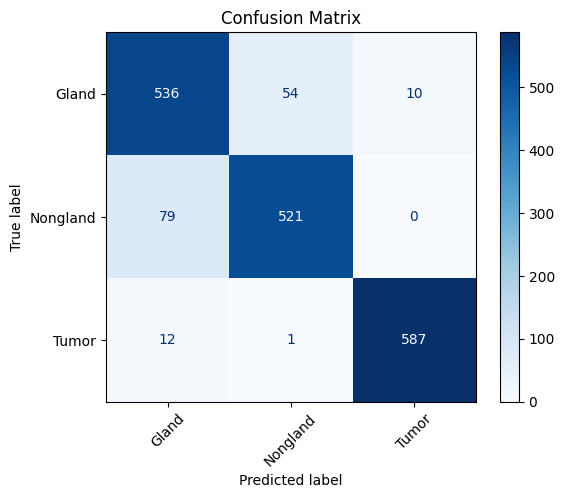

In [4]:
##scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##train the model
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train)

##make predictions
y_pred = linear_svm.predict(X_test_scaled)

##evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Gland', 'Nongland', 'Tumor']))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Gland', 'Nongland', 'Tumor'])
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()